## Final Project Submission

Please fill out:
* Student name: Jerry Narkiso
* Student pace: full time
* Scheduled project review date/time: 22 March 2024
* Instructor name: Asha Deen
* Blog post URL: https://github.com/jerrynarkiso/dsc-phase-1-project-v2-4


## ADVERTISING CORPORATION FOR MOVIES BASED ON MOVIE BUDGET


1. **Introduction**
  

In the fast-paced and ever-evolving landscape of the entertainment industry, effective marketing and advertising strategies play a pivotal role in the success of movies. As the bridge between filmmakers and audiences, Movie Advertising Corporation (MAC) emerges as a dynamic and innovative partner, dedicated to revolutionizing the way movies are promoted and positioned in the market.

1.1) **Business Concept**

At Movie Advertising Corporation, we specialize in crafting tailored advertising solutions that leverage the unique attributes of each film to captivate audiences and drive box office success. The approach is rooted in data-driven insights, creative excellence, and strategic partnerships, ensuring that every marketing campaign is meticulously designed to maximize impact and reach

1.2) **Mission Statement**

The mission is to revolutionize the advertising landscape for movies by leveraging data-driven strategies and innovative approaches to maximize the impact of every marketing campaign. We are committed to empowering filmmakers and studios to reach their target audiences effectively while delivering unparalleled value and ROI. Through our dedication to creativity, integrity, and excellence, we aim to be the trusted partner of choice for movie advertising, driving success and growth for our clients in an ever-evolving entertainment industry.

1.3) **Vision**

The vision at The Movie Advertising Corporation is to redefine the way movies are marketed and promoted, setting new standards of effectiveness, efficiency, and creativity in the advertising industry. We envision a future where every movie campaign is tailored with precision, leveraging cutting-edge technologies and insights to captivate audiences and drive box office success. By fostering innovation, collaboration, and strategic thinking, we aspire to shape the future of movie advertising, empowering filmmakers to realize their visions and audiences to discover the magic of cinema in exciting new ways

1.4) **Key Objectives**

Market Research and Analysis: Conduct comprehensive market research to understand audience preferences, industry trends, and competitor strategies, enabling data-driven decision-making in advertising campaigns.

Budget Optimization: Develop cost-effective advertising strategies that maximize the impact of the allocated budget, optimizing spending across various advertising channels to achieve the highest ROI for filmmakers and studios.

Audience Targeting and Segmentation: Utilize advanced targeting techniques to identify and segment relevant audience groups based on demographics, interests, and behavior, tailoring advertising messages to resonate with specific audience segments effectively.

Creative Content Development: Collaborate with creative teams to produce compelling advertising content, including trailers, posters, and digital assets, that effectively communicates the unique selling points and emotional appeal of each movie.

Multi-Channel Advertising: Implement integrated advertising campaigns across multiple channels, including digital, social media, television, print, and outdoor, to maximize reach and engagement with diverse audience segments.

Performance Monitoring and Optimization: Monitor advertising performance in real-time, leveraging analytics and KPIs to assess campaign effectiveness and make data-driven optimizations to improve outcomes and achieve campaign objectives.

Brand Building and Reputation Management: Cultivate strong brand identities for movies through consistent messaging and branding initiatives, building positive perceptions and fostering audience loyalty and advocacy.

Strategic Partnerships and Collaborations: Establish strategic partnerships with media agencies, advertising platforms, influencers, and promotional partners to amplify advertising efforts, expand reach, and access new audience segments effectively.

Compliance and Regulatory Adherence: Ensure compliance with advertising regulations and industry standards, maintaining transparency, honesty, and ethical practices in all advertising activities to uphold trust and credibility with audiences.

Continuous Innovation and Adaptation: Embrace innovation and stay abreast of emerging advertising trends, technologies, and consumer behaviors, adapting advertising strategies and tactics accordingly to remain agile and competitive in the dynamic movie advertising landscape.

1.5) **Revenue Model**

Movie Advertising Corporation generates revenue through a variety of channels, including:

Advertising Services: Offering comprehensive advertising solutions, including digital marketing, social media campaigns, traditional media placement, influencer partnerships, and experiential activations.

Consulting Services: Providing strategic consulting services to filmmakers and studios, including market analysis, campaign planning, and audience targeting.

Partnership Opportunities: Securing partnerships with brands for product placement, promotional tie-ins, and sponsorship deals associated with movie releases.

Data Analytics: Offering data analytics and insights services to track campaign performance, measure audience engagement, and optimize advertising strategies for maximum impact.

## 2) Data Analysis

2.1) **Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

2.2) **Total tables in the dataset**

In [6]:


def show_tables_summary(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract table names
    table_names = df.columns
    
    # Display total number of tables
    total_tables = len(table_names)
    print(f"Total tables in the TN Movie budget dataset: {total_tables}")
    
    # Display table names
    print("\nTable Names:")
    for i, table_name in enumerate(table_names, 1):
        print(f"{i}. {table_name}")

# Example usage
csv_file = "tn.movie_budgets.csv" 
show_tables_summary(csv_file)


Total tables in the TN Movie budget dataset: 6

Table Names:
1. id
2. release_date
3. movie
4. production_budget
5. domestic_gross
6. worldwide_gross


2.3) **Total Movie Titles in the dataset**

In [7]:


def total_movie_titles(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Find the column containing movie titles
    title_columns = [col for col in df.columns if 'title' in col.lower()]
    
    if not title_columns:
        raise ValueError("No column containing movie titles found.")
    
    # Assuming the first title column found contains the movie titles
    title_column = title_columns[0]
    
    # Count unique movie titles in the selected column
    total_titles = len(df[title_column].unique())
    
    return total_titles

csv_file = "tmdb.movies.csv"  
total_titles = total_movie_titles(csv_file)
print(f"Total number of movie titles in the dataset: {total_titles}")

Total number of movie titles in the dataset: 24835


2.4) **Movies with the highest production budget**

In [14]:
# Load the CSV file into a DataFrame
df = pd.read_csv("tn.movie_budgets.csv")

# Convert 'production_budget' column to numeric
df['production_budget'] = pd.to_numeric(df['production_budget'].str.replace('$', '').str.replace(',', ''))

# Sort the DataFrame by 'production_budget' column in descending order and select top 10
top_10_highest_budgets = df.nlargest(10, 'production_budget')

# Display movies with the top 10 highest budgets
print("Movies with the Top 10 Highest Production Budgets:")
print(top_10_highest_budgets[['movie', 'production_budget']])


Movies with the Top 10 Highest Production Budgets:
                                         movie  production_budget
0                                       Avatar          425000000
1  Pirates of the Caribbean: On Stranger Tides          410600000
2                                 Dark Phoenix          350000000
3                      Avengers: Age of Ultron          330600000
4            Star Wars Ep. VIII: The Last Jedi          317000000
5         Star Wars Ep. VII: The Force Awakens          306000000
6                       Avengers: Infinity War          300000000
7   Pirates of the Caribbean: At Worldâs End          300000000
8                               Justice League          300000000
9                                      Spectre          300000000


2.5) **Top 50 movies according to worldwide gross**

In [16]:
df = pd.read_csv("tn.movie_budgets.csv")

# Sort the DataFrame by 'worldwide_gross' column in descending order and select top 30
top_30_movies = df.sort_values(by='worldwide_gross', ascending=False).head(30)

# Display top 30 movies according to worldwide gross
print("Top 50 Movies According to Worldwide Gross:")
print(top_30_movies[['movie', 'worldwide_gross']])

Top 50 Movies According to Worldwide Gross:
                               movie worldwide_gross
3737          Fifty Dead Men Walking        $997,921
3432                            Duma        $994,790
5062                       Insidious     $99,870,886
883                          Hellboy     $99,823,958
5613                         Mad Max     $99,750,000
1078                           Alpha     $99,624,873
1682                  Street Fighter     $99,423,000
1792                     Nacho Libre     $99,296,462
4373                     Desert Blue         $99,147
2343                          Hitman     $99,135,571
381        Where the Wild Things Are     $99,123,656
3247  Justin Bieber: Never Say Never     $99,034,125
591                         The Wild     $99,010,667
4358                   American Teen        $989,319
608                    The Lion King    $986,214,868
582                 The Time Machine     $98,983,590
3364                       Philomena     $98,963,392
10

2.6) **Graph of Production Budget against Worldwide Gross**

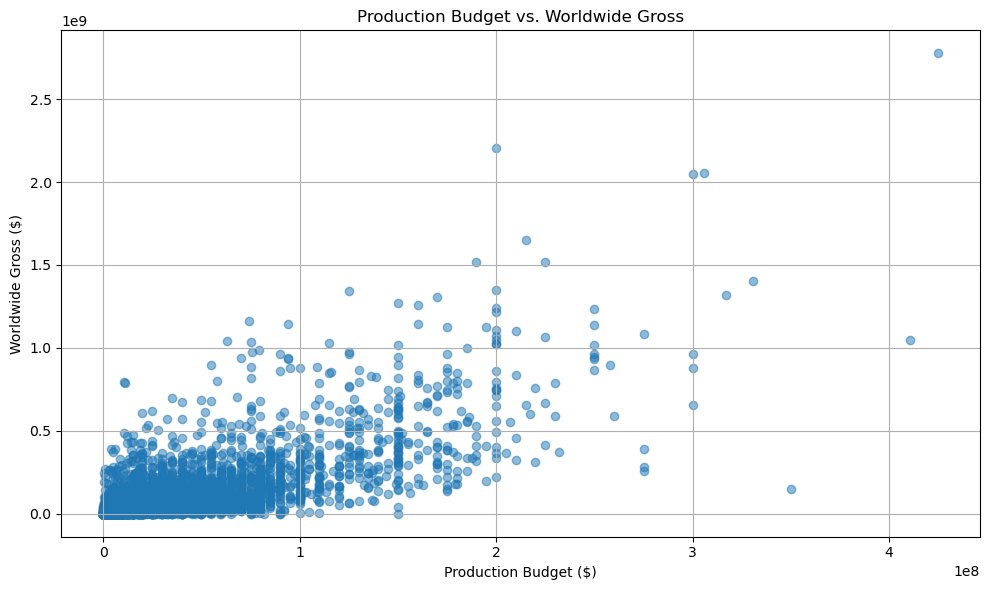

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("tn.movie_budgets.csv")

# Convert 'production_budget' and 'worldwide_gross' columns to numeric
df['production_budget'] = df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Plot production_budget against worldwide_gross
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
